In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [2]:
topix_data = pd.read_csv("./topix/topix2000-2018.csv", encoding="shift-jis",index_col='Date')

In [3]:
usdjpy_data = pd.read_csv("USDJPY2.csv", encoding="UTF-8",index_col="日付")

In [4]:
topix_data.head()

,Open,High,Low,Close
Date,,,,
2000-01-04,1726.21,1744.16,1710.34,1717.47
2000-01-05,1709.57,1709.57,1612.91,1651.84
2000-01-06,1654.14,1657.77,1609.30,1609.59
2000-01-07,1607.33,1609.22,1585.80,1599.01
2000-01-11,1607.12,1679.71,1607.12,1678.82


In [5]:
topix_data.index = pd.to_datetime(topix_data.index)

In [6]:
topix_data.index

DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
               '2000-01-17', '2000-01-18',
               ...
               '2018-12-14', '2018-12-17', '2018-12-18', '2018-12-19',
               '2018-12-20', '2018-12-21', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28'],
              dtype='datetime64[ns]', name='Date', length=4664, freq=None)

タイムゾーンを東京に設定

In [7]:
topix_data.index = topix_data.index.tz_localize('Asia/Tokyo')

東京証券取引所の開始時間を設定

In [8]:
topix_data.index = topix_data.index + pd.Timedelta('0 days 8:00:00')

In [9]:
topix_data.index 

DatetimeIndex(['2000-01-04 08:00:00+09:00', '2000-01-05 08:00:00+09:00',
               '2000-01-06 08:00:00+09:00', '2000-01-07 08:00:00+09:00',
               '2000-01-11 08:00:00+09:00', '2000-01-12 08:00:00+09:00',
               '2000-01-13 08:00:00+09:00', '2000-01-14 08:00:00+09:00',
               '2000-01-17 08:00:00+09:00', '2000-01-18 08:00:00+09:00',
               ...
               '2018-12-14 08:00:00+09:00', '2018-12-17 08:00:00+09:00',
               '2018-12-18 08:00:00+09:00', '2018-12-19 08:00:00+09:00',
               '2018-12-20 08:00:00+09:00', '2018-12-21 08:00:00+09:00',
               '2018-12-25 08:00:00+09:00', '2018-12-26 08:00:00+09:00',
               '2018-12-27 08:00:00+09:00', '2018-12-28 08:00:00+09:00'],
              dtype='datetime64[ns, Asia/Tokyo]', name='Date', length=4664, freq=None)

In [10]:
usdjpy_data.head()

,終値,始値,高値,安値,前比%
日付,,,,,
2000-01-03,101.59,102.11,102.18,101.31,-0.66%
2000-01-04,103.27,101.46,103.28,101.40,1.65%
2000-01-05,104.29,103.28,104.40,102.76,0.99%
2000-01-06,105.33,104.32,105.55,103.97,1.00%
2000-01-07,105.36,105.27,105.91,104.85,0.03%


In [11]:
usdjpy_data.index = pd.to_datetime(usdjpy_data.index)

In [12]:
usdjpy_data.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2018-12-19', '2018-12-20', '2018-12-21', '2018-12-23',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-30'],
              dtype='datetime64[ns]', name='日付', length=4984, freq=None)

タイムゾーンをアメリカ東時間に設定

In [13]:
usdjpy_data.index=usdjpy_data.index.tz_localize('US/Eastern')

ニューヨーク取引所の終了時間を設定

In [14]:
usdjpy_data.index = usdjpy_data.index + pd.Timedelta('0 days 16:00:00')

In [15]:
usdjpy_data.index =usdjpy_data.index.tz_convert('Asia/Tokyo')

In [16]:
usdjpy_data.index

DatetimeIndex(['2000-01-04 06:00:00+09:00', '2000-01-05 06:00:00+09:00',
               '2000-01-06 06:00:00+09:00', '2000-01-07 06:00:00+09:00',
               '2000-01-08 06:00:00+09:00', '2000-01-11 06:00:00+09:00',
               '2000-01-12 06:00:00+09:00', '2000-01-13 06:00:00+09:00',
               '2000-01-14 06:00:00+09:00', '2000-01-15 06:00:00+09:00',
               ...
               '2018-12-20 06:00:00+09:00', '2018-12-21 06:00:00+09:00',
               '2018-12-22 06:00:00+09:00', '2018-12-24 06:00:00+09:00',
               '2018-12-25 06:00:00+09:00', '2018-12-26 06:00:00+09:00',
               '2018-12-27 06:00:00+09:00', '2018-12-28 06:00:00+09:00',
               '2018-12-29 06:00:00+09:00', '2018-12-31 06:00:00+09:00'],
              dtype='datetime64[ns, Asia/Tokyo]', name='日付', length=4984, freq=None)

TOPIXと為替データを日付でマージするための処理

In [17]:
topix_data.index = topix_data.index.strftime("%Y/%m/%d")

In [18]:
usdjpy_data.index = usdjpy_data.index.strftime("%Y/%m/%d")

In [19]:
merge = pd.merge(topix_data,usdjpy_data,left_index=True,right_index=True)

In [20]:
merge.head()

,Open,High,Low,Close,終値,始値,高値,安値,前比%
2000/01/04,1726.21,1744.16,1710.34,1717.47,101.59,102.11,102.18,101.31,-0.66%
2000/01/05,1709.57,1709.57,1612.91,1651.84,103.27,101.46,103.28,101.40,1.65%
2000/01/06,1654.14,1657.77,1609.30,1609.59,104.29,103.28,104.40,102.76,0.99%
2000/01/07,1607.33,1609.22,1585.80,1599.01,105.33,104.32,105.55,103.97,1.00%
2000/01/11,1607.12,1679.71,1607.12,1678.82,105.11,105.12,105.39,104.30,-0.24%


In [21]:
merge[['Open','終値']].head()

,Open,終値
2000/01/04,1726.21,101.59
2000/01/05,1709.57,103.27
2000/01/06,1654.14,104.29
2000/01/07,1607.33,105.33
2000/01/11,1607.12,105.11


In [22]:
temp =merge[['Open','終値']].diff()

In [23]:
temp.columns

Index(['Open', '終値'], dtype='object')

In [24]:
temp.columns = ['TOPIX', 'EXCH']

In [25]:
temp.head()

,TOPIX,EXCH
2000/01/04,NaN,NaN
2000/01/05,-16.64,1.68
2000/01/06,-55.43,1.02
2000/01/07,-46.81,1.04
2000/01/11,-0.21,-0.22


500日間ローリング相関を計算

同時相関（終値＝ドルの値）

In [26]:
rollingcorr =temp["EXCH"].rolling(500).corr(temp["TOPIX"]) #1

＄の値を1日先行（為替先行）

In [27]:
rollingcorrm1 =temp["EXCH"].rolling(500).corr(temp["TOPIX"].shift(-1)) #1

＄の値を1日遅らせる（株価先行）

In [28]:
rollingcorrp1 =temp["EXCH"].rolling(500).corr(temp["TOPIX"].shift(+1)) #1

Text(0.5, 1.0, 'TOPIX-為替相場の相関')

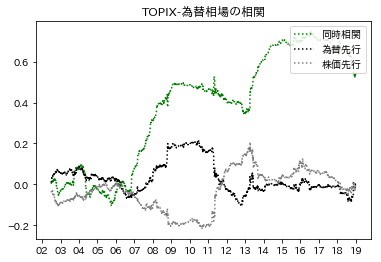

In [29]:
import matplotlib.dates as mdates
rollingcorrp1.index = pd.to_datetime(rollingcorrp1.index)
fig, ax1 = plt.subplots()

ax1.plot(rollingcorrp1.index,rollingcorr,color='green',linestyle='dotted',label="同時相関")
ax1.plot(rollingcorrp1.index,rollingcorrm1,color='black',linestyle='dotted',label="為替先行")
ax1.plot(rollingcorrp1.index,rollingcorrp1,color='gray',linestyle='dotted',label="株価先行")

# Formatterでx軸の日付ラベルを年に設定
xfmt = mdates.DateFormatter("%y")

# DayLocatorで間隔を年数に
xloc = mdates.YearLocator()

ax1.xaxis.set_major_locator(xloc)
ax1.xaxis.set_major_formatter(xfmt)

plt.legend(loc='upper right')
plt.title('TOPIX-為替相場の相関',loc='center')
